# DSCI 100 – Individual Planning Stage

**Minecraft** is a game many of us grew up with, whether it was playing on a split screen with your siblings, playing online with your friends from a distance, or even just on your phone in the middle of class. In this project, we will focus on understanding player behaviour using the `players.csv` dataset. 
Below is shown the first few observations of the dataset.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(lubridate)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [16]:
url_players <- "https://raw.githubusercontent.com/egshiglened/dsci_100_project_033/main/players.csv"
url_sessions <- "https://raw.githubusercontent.com/egshiglened/dsci_100_project_033/main/sessions.csv"

players <- read_csv(url_players)
sessions <- read_csv(url_sessions)
head(players) 
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The dataset `players.csv` has information of **196** players, including their age, gender, experience level, total play hours and whether they subscribed to a newsletter. These features describe who the players are and how they interact with the research community. The `sessions.csv` contains **1535** gameplay sessions, that show when each gameplay started and ended. This data shows how long and how often players engage with the game. I have summarized both datasets, but I am mainly focusing on the `players.csv` dataset for my question. 

**Potential issues that may occur in `players.csv` that may affect the analysis:**
- Some players play a small amount of time and some play a lot. This can cause the distribution to be skewed, which can reduce the model performance and make relationships seem weak.
- Age or gender may be inaccurate as some people can self-report them.
- If the dataset has a lot more true than false, models may only guess true.

In [17]:
players_summary <- summary(players)
sessions_summary <- summary(sessions)
players_summary
sessions_summary 

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

**Description of variables for players.csv** :

| Column | Data type     | Description |
|--------|-----------|-------------|
|`experience` | Character   | Tells us the experience level of each player (e.g. "Pro", "Amateur") |
|`subscribe` | Logical   | Tells us whether the player subcribed to the newsletter or not. 'TRUE' means they have and 'FALSE' means they have not. | 
| `hashedEmail` | Character   | Shows us the player identifier that is unique to each player. |
| `played_hours` | Double (numeric)   | Describes the total hours played by each player |
| `name` | Character   | Players' in-game name (won't be used for analysis) | 
|`gender` | Character   | Players' gender |
|`Age` | Double (numeric)   | Players' age |

**Description of variables for sessions.csv** :

| Column | Data type | Description | 
|---------|----------|--------------|
|`hashedEmail`| Character | Identifier (similar to the one in `players.csv`) that can help us link each session to the player |
|`start_time` | Character | Timestamp that shows when the session started |
|`end_time` | Character | Timestamp that shows when the session ended |
|`original_start_time` | Double (numeric) | Start time in milliseconds |
|`original_end_time` | Double (numeric) | End time in milliseconds |

## Questions
**Broad question:**
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific question:**
Does the player's total hours played predict whether they subscribe to the newsletter? 

There will not be any tidying because the data is **already tidy**, because each row represents a single observation, each column contains one variable such as age, experience, and each cell has one value. We will be wrangling a bit to get the data ready for analysis and visualization. 

**Wrangling steps:**
- Convert `subscribe` to factor, as regression and classification models need the variable we're going to predict to be a categorical factor, not a logical type.
- Variables like `experience`, `gender` and `name` need to be factors as well.

In [20]:
players_summary <- players |>
  summarise(avg_age = round(mean(Age, na.rm = TRUE), 2), 
            avg_played_hours = round(mean(played_hours, na.rm = TRUE), 2))
players_summary

avg_age,avg_played_hours
<dbl>,<dbl>
21.14,5.85


In [21]:
players_1 <- players |>
mutate(subscribe = as.factor(subscribe), 
       experience = as.factor(experience),
       gender = as.factor(gender),
       name = as.factor(name))
players_1

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<fct>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


For the next step, we will be visualizing to check the distribution of played hours and look at the skewness. 

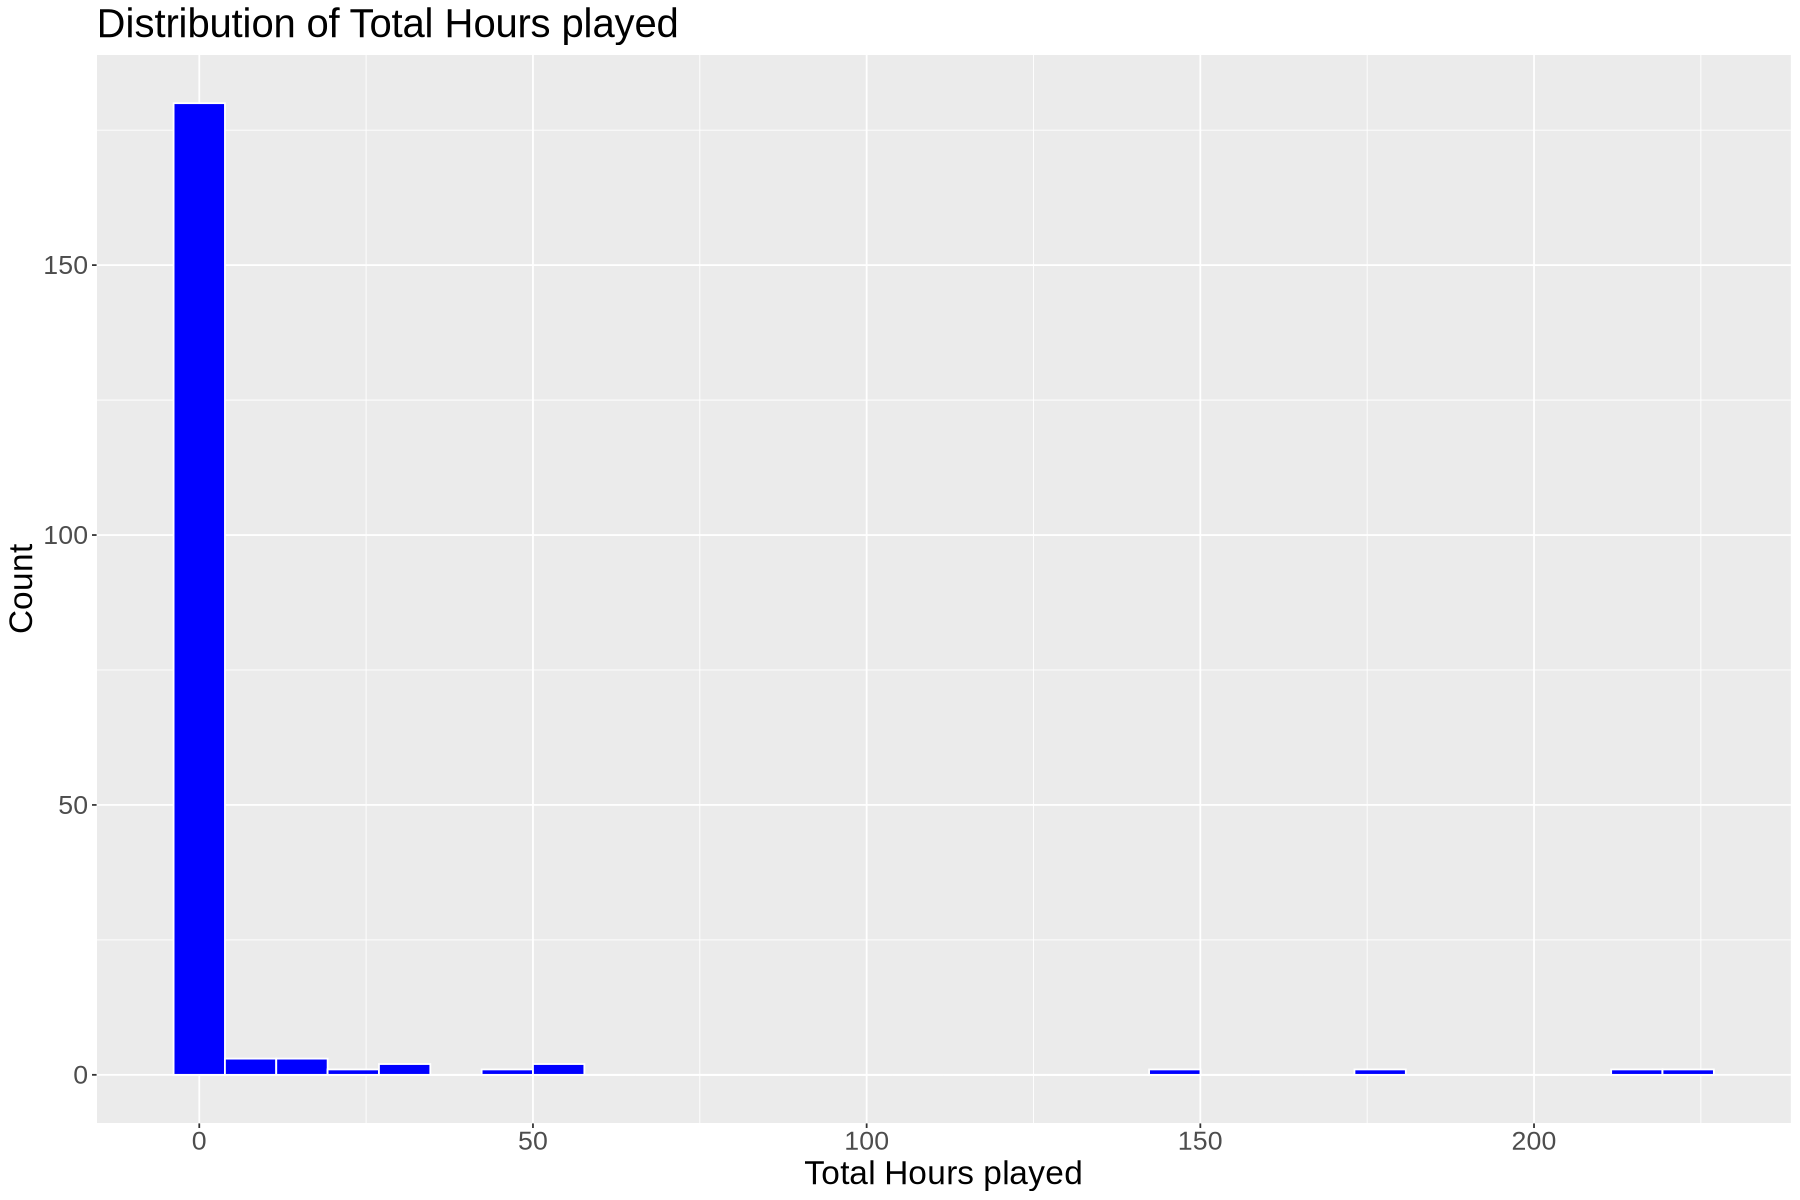

In [22]:
options(repr.plot.width = 15, repr.plot.height = 10)
players_histogram <- players_1 |>
ggplot(aes(x = played_hours)) + geom_histogram(bins = 30, fill = "blue", color = "white") +
labs(title = "Distribution of Total Hours played", 
     x = "Total Hours played",
     y = "Count") + theme(text = element_text(size = 20))
players_histogram


The distribution is extremely skewed. There are many players with low hours, and only a few players have large hours. We will be using the scale_x_log10() to allow for us to better visualize without the skewness interfering.  

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


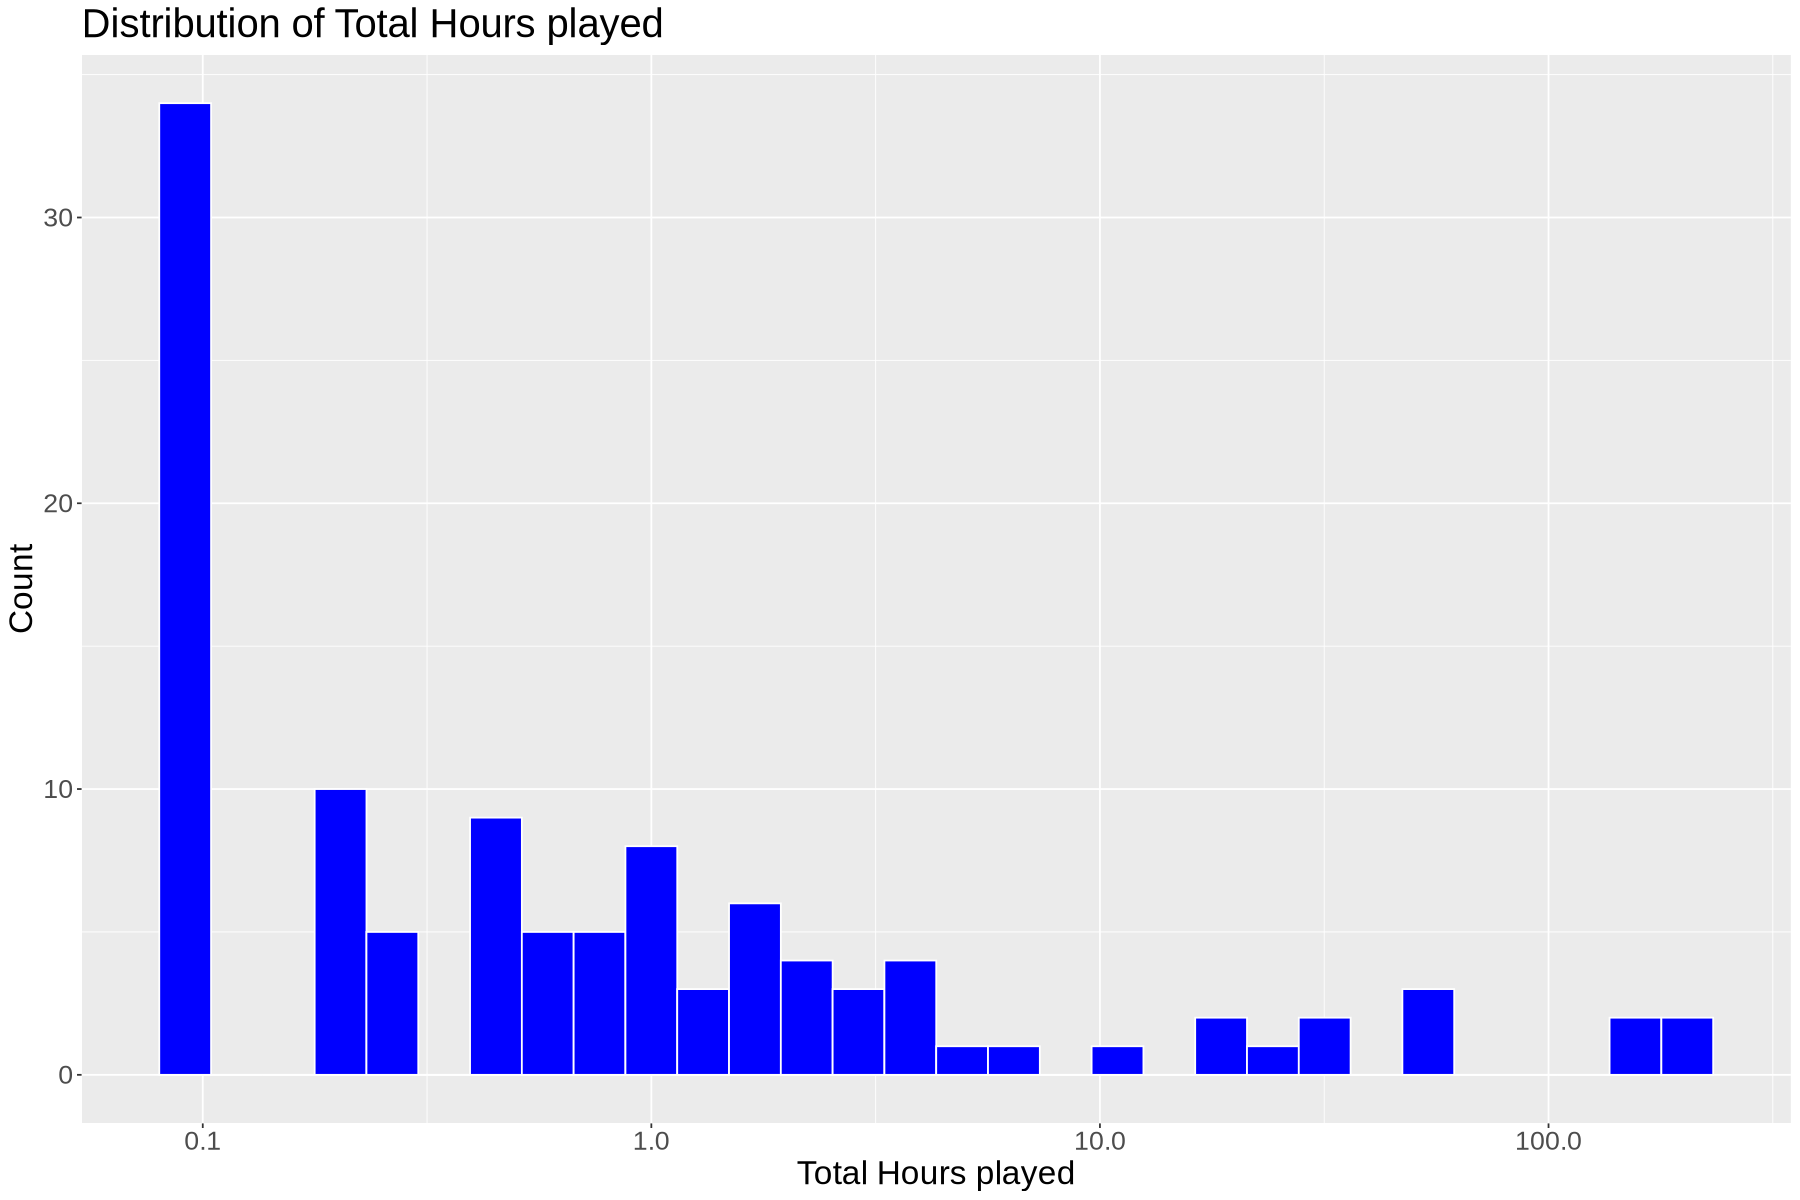

In [23]:
players_histogram <- players_1 |>
ggplot(aes(x = played_hours)) + geom_histogram(bins = 30, fill = "blue", color = "white")+ 
scale_x_log10()+
labs(title = "Distribution of Total Hours played", 
     x = "Total Hours played",
     y = "Count") + theme(text = element_text(size = 20))
players_histogram